# Práctica 2: Regresión lineal.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino


In [1]:
from sklearn import model_selection,linear_model,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Descripción del conjunto de datos. Convertir a minutos.

In [2]:
data_csv = pd.read_csv('./tiempos.csv', sep = ';')

#Matriz de los datos convertidos.
data = np.empty((data_csv.shape[0],data_csv.shape[1]))
    
#Conversión a minutos.
for i in range(len(data_csv)):
    conversion = []
    for item in data_csv.iloc[i]:
        times = item.split(':')
        minute = int(times[0]) * 60 + int(times[1])
        conversion.append(minute)
    data[i] = conversion

In [3]:
#Array resultante.
data

array([[172., 254., 356., ..., 514., 636., 703.],
       [163., 253., 371., ..., 556., 674., 738.],
       [188., 279., 389., ..., 580., 728., 803.],
       ...,
       [208., 329., 452., ..., 659., 797., 875.],
       [139., 206., 283., ..., 410., 516., 575.],
       [201., 306., 443., ..., 684., 856., 943.]])

## Ejercicio 1. Estimación por regresión lineal.

### 1. División del conjunto de entrenamiento.

In [4]:
data_x = data[:, 0:len(data[0])-1]
data_y = data[:, len(data[0])-1:len(data[0])]

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

### 2. Regresión lineal.

In [5]:
#Caso 1. fit_intercept = True. Muestras centradas en la media.
reg = linear_model.LinearRegression().fit(x_train, y_train)
pesos = reg.coef_
interseccion = reg.intercept_
coef1 = np.append(interseccion, pesos)

#Caso 2. fit_intercept = False. Muestras no centradas en la media.
reg_new = linear_model.LinearRegression(fit_intercept=False)
reg2 = reg_new.fit(x_train, y_train)
pesos2 = reg2.coef_
interseccion2 = reg2.intercept_
coef2 = np.append(interseccion2, pesos2)

print('Coeficientes de las muestras centradas en la media:\n',coef1)
print('Coeficientes de las muestras no centradas en la media:\n',coef2)

Coeficientes de las muestras centradas en la media:
 [13.16667834 -0.06995518 -0.15491091 -0.35133136  0.45460967 -0.49426652
  1.48324716]
Coeficientes de las muestras no centradas en la media:
 [ 0.          0.18542743 -0.37427048 -0.14683954  0.34347353 -0.50856613
  1.48586651]


### 3. Predicción.

In [6]:
#Caso 1.
y_pred = reg.predict(x_test)

#Caso 2.
y_pred2 = reg2.predict(x_test)

### 4. Error cuadrático medio.

In [7]:
#Caso 1.
error1 = metrics.mean_squared_error(y_test, y_pred, squared = False)

#Caso 2.
error2 = metrics.mean_squared_error(y_test, y_pred2, squared = False)

print('Error cuadrático medio  de las muestras centradas en la media: ', error1)
print('Error cuadrático medio  de las muestras no centradas en la media: ', error2)

Error cuadrático medio  de las muestras centradas en la media:  11.25288458631641
Error cuadrático medio  de las muestras no centradas en la media:  10.694054990052388


### 5. Gráfico de barras.

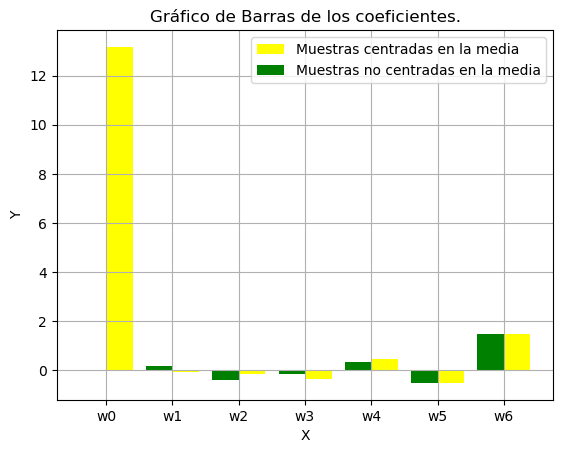

In [8]:
etiquetas = ['w0','w1', 'w2', 'w3', 'w4', 'w5', 'w6']
x = np.array(range(7))

ax = plt.subplot(111)
ax.bar(x, coef1, width=0.4, color='yellow')
ax.bar(x-0.4, coef2, width=0.4, color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(x-0.2, etiquetas)
ax.legend(['Muestras centradas en la media', 'Muestras no centradas en la media'])
ax.set_title('Gráfico de Barras de los coeficientes.')
ax.grid()
plt.show()

## Ejercicio 2. Estimación por regresión lineal con regularización.

### 1. División del conjunto de entrenamiento.

In [9]:
data_x = data[:, 0:len(data[0])-1]
data_y = data[:, len(data[0])-1:len(data[0])]

#Función train_test_split
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

### 2. Modelo de regresión lineal con regularización Ridge.

In [10]:
#Caso 1. fit_intercept = True. Muestras centradas en la media.
lambda_ridge = [1, 700, 5000, 6]
regresiones = []
errores = []

for item in lambda_ridge:
    clf = linear_model.Ridge(alpha=item)
    reg = clf.fit(x_train, y_train)
    pesos = reg.coef_
    interc= reg.intercept_
    coef = np.append(interc, pesos)
    regresiones.append(coef)
    
    y_pred = reg.predict(x_test)
    error = metrics.mean_squared_error(y_test, y_pred, squared = False)
    errores.append(error)

print('Coeficientes para los distintos lambdas: \n')
for line in regresiones:
    print('  '.join(map(str, line)))
print('\n\nErrores para los distintos lambdas: \n')
for err in errores:
    print(err, ' ')

Coeficientes para los distintos lambdas: 

13.164412967798285  -0.06984825947962635  -0.15518503701860542  -0.3502723062041585  0.4536488552476753  -0.4941364204286391  1.4832122362565383
12.983242459348048  -0.06647430791880067  -0.1896956293750949  -0.1092739661355189  0.20878484370884634  -0.4282892884103761  1.455708311907798
12.682421599737381  -0.09988495915928927  -0.13330946204363284  -0.04788436634838679  0.039039261121706706  -0.2003813626985678  1.326508057203429
13.153373570864233  -0.06932841154263776  -0.1565252769587788  -0.3450674124951506  0.44892117864294945  -0.49348997615282525  1.4830367994857716


Errores para los distintos lambdas: 

11.252507637809154  
11.193136894396183  
11.334284721625144  
11.250664054196838  


In [11]:
#Caso 2. fit_intercept = False. Muestras no centradas en la media.
regresiones2 = []
errores2 = []

for item in lambda_ridge:
    clf2 = linear_model.Ridge(alpha=item, fit_intercept=False)
    reg2 = clf2.fit(x_train, y_train)
    pesos2 = reg2.coef_
    interc2= reg2.intercept_
    coef2 = np.append(interc2, pesos2)
    regresiones2.append(coef2)
    
    y_pred2 = reg2.predict(x_test)
    error2 = metrics.mean_squared_error(y_test, y_pred2, squared = False)
    errores2.append(error2)

print('Coeficientes para los distintos lambdas: \n')
for line in regresiones2:
    print ('  '.join(map(str, line)))
print('\n\nErrores para los distintos lambdas: \n')
for err in errores2:
    print(err, ' ')

Coeficientes para los distintos lambdas: 

0.0  0.18534508877271624  -0.3742494548976234  -0.14638020846435384  0.3430023884806864  -0.5084598406922021  1.4858206402838057
0.0  0.1264547159809  -0.32076366312080695  -0.03882545311934851  0.20470058537764607  -0.44803707313817154  1.4543044809494035
0.0  -0.005208112103311905  -0.16404615335436665  -0.022460365676432215  0.06034807637269066  -0.21724357201286884  1.3181583048460872
0.0  0.184931042372678  -0.37413510120654564  -0.144120667017531  0.3406790959366435  -0.5079303986789298  1.4855910922566238


Errores para los distintos lambdas: 

10.693981400381228  
10.692886293762832  
10.982774544773877  
10.693620988185286  


### 2. Gráfico con valores de lambda.

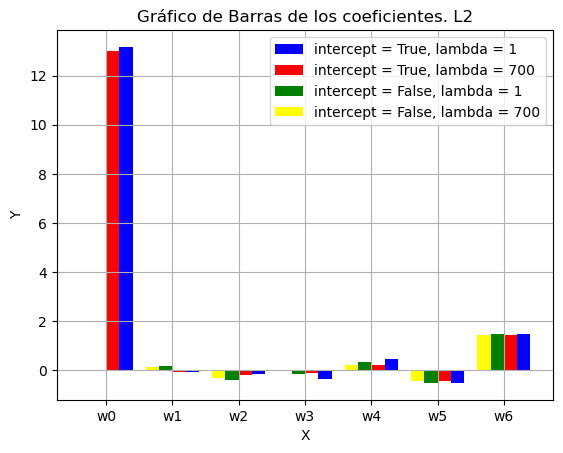

In [12]:
#Caso 1. 
x1 = regresiones[0] #lambda = 1
x2 = regresiones[1] #lambda = 700

#caso 2.
x3 = regresiones2[0] #lambda = 1
x4 = regresiones2[1] #lambda = 700

etiquetas = ['w0','w1', 'w2', 'w3', 'w4', 'w5', 'w6']
x = np.array(range(7))

ax = plt.subplot(111)
ax.bar(x, x1, width=0.2, color='blue')
ax.bar(x-0.2, x2, width=0.2, color='red')
ax.bar(x-0.4, x3, width=0.2, color='green')
ax.bar(x-0.6, x4, width=0.2, color='yellow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(x-0.3, etiquetas)
ax.legend(['intercept = True, lambda = 1', 'intercept = True, lambda = 700', 'intercept = False, lambda = 1', 'intercept = False, lambda = 700'])
ax.set_title('Gráfico de Barras de los coeficientes. L2')
ax.grid()
plt.show()

### 3. Modelo de regresión lineal con regularización con Lasso.

In [13]:
#Caso 1. fit_intercept = True. Muestras centradas en la media.
lambda_lasso = [1, 700, 5000, 6]
regresiones = []
errores = []

for item in lambda_lasso:
    clf = linear_model.Lasso(alpha=item)
    reg = clf.fit(x_train, y_train)
    pesos = reg.coef_
    interc= reg.intercept_
    coef = np.append(interc, pesos)
    regresiones.append(coef)
    
    y_pred = reg.predict(x_test)
    error = metrics.mean_squared_error(y_test, y_pred, squared = False)
    errores.append(error)
    
print('Coeficientes para los distintos lambdas: \n')
for line in regresiones:
    print('  '.join(map(str, line)))
print('\n\nErrores para los distintos lambdas: \n')
for err in errores:
    print(err, ' ')

Coeficientes para los distintos lambdas: 

12.215118097371715  -0.014130666945431178  -0.23675711088431892  -0.0  0.11526716289349591  -0.452745215572976  1.4765626786729136
17.458475424636845  0.0  0.0  0.0  0.0  0.0  1.0827915797576002
155.4545964273027  0.0  0.0  0.0  0.0  0.0  0.9067232776677383
11.924733680286408  -0.0  -0.1579306432119239  -0.0  0.0  -0.35268868769646666  1.4301829184693278


Errores para los distintos lambdas: 

11.144452413819074  
12.354103972092158  
34.705109356179754  
11.15556088769302  


In [14]:
#Caso 2. fit_intercept = False. Muestras no centradas en la media.
regresiones2 = []
errores2 = []

for item in lambda_lasso:
    clf2 = linear_model.Lasso(alpha=item, fit_intercept=False)
    reg2 = clf2.fit(x_train, y_train)
    pesos2 = reg2.coef_
    interc2= reg2.intercept_
    coef2 = np.append(interc2, pesos2)
    regresiones2.append(coef2)
    
    y_pred2 = reg2.predict(x_test)
    error2 = metrics.mean_squared_error(y_test, y_pred2, squared = False)
    errores2.append(error2)

print('Coeficientes para los distintos lambdas: \n')
for line in regresiones2:
    print ('  '.join(map(str, line)))
print('\n\nErrores para los distintos lambdas: \n')
for err in errores2:
    print(err, ' ')

Coeficientes para los distintos lambdas: 

0.0  -2.028041813912654  0.6188964983227007  0.3126674505416024  0.15260790717134473  0.6129844908497659  0.6311601528643597
0.0  0.0  0.0  0.0  0.0  0.29713005830501416  0.8681888532577798
0.0  0.0  0.0  0.0  0.0  0.0  1.0974826678408705
0.0  -1.9435737329261553  0.5355392426897349  0.3210754722365682  0.15380903560225065  0.6173948145786852  0.6331082327942628


Errores para los distintos lambdas: 

20.646579759145226  
13.912893370654771  
12.1179154181751  
20.38178928192983  


C:\Users\Susana\anaconda3\envs\aa1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.478e+04, tolerance: 1.460e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Susana\anaconda3\envs\aa1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+04, tolerance: 1.460e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Susana\anaconda3\envs\aa1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

### 4. Gráfico con valores de lambda.

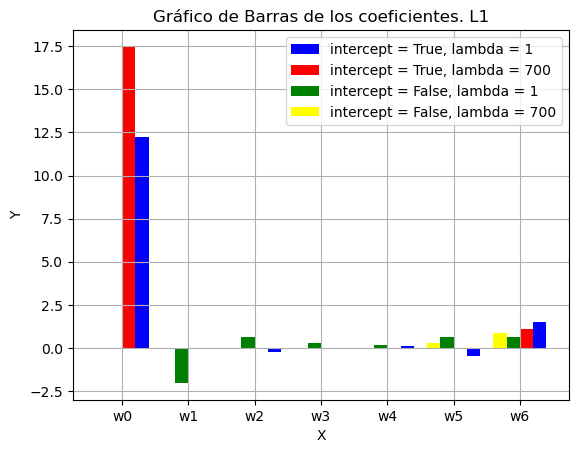

In [15]:
#Caso 1. 
x1 = regresiones[0] #lambda = 1
x2 = regresiones[1] #lambda = 700

#caso 2.
x3 = regresiones2[0] #lambda = 1
x4 = regresiones2[1] #lambda = 700

etiquetas = ['w0','w1', 'w2', 'w3', 'w4', 'w5', 'w6']
x = np.array(range(7))

ax = plt.subplot(111)
ax.bar(x, x1, width=0.2, color='blue')
ax.bar(x-0.2, x2, width=0.2, color='red')
ax.bar(x-0.4, x3, width=0.2, color='green')
ax.bar(x-0.6, x4, width=0.2, color='yellow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(x-0.3, etiquetas)
ax.legend(['intercept = True, lambda = 1', 'intercept = True, lambda = 700', 'intercept = False, lambda = 1', 'intercept = False, lambda = 700'])
ax.set_title('Gráfico de Barras de los coeficientes. L1')
ax.grid()
plt.show()

### Conclusiones.
En el método de regularización **Lasso** podemos observar que en muchos casos de lambda hay bastantes pesos que son nulos ya que este modelo fuerza a que los coeficientes de los predictores tiendan a cero así consigue excluir los predictores menos relevantes.
Mientras que en el método **Ridge** lo que se hace es  reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero.

**Lasso** supone una ventaja notable en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.Mientras que cuando existen predictores altamente correlacionados linealmente, **Ridge** reduce la influencia de todos ellos a la vez y de forma proporcional.